## Model Training
#### 1.1 Import Data and Required Packages

Importing Pandas, NumPy, Matplotlib, Seaborn, Warning Library.

In [40]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import missingno as mno

# Modelling
import joblib
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, f1_score, confusion_matrix, classification_report  
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv("C:/Users/chhot/Dropbox/Omdena/Water Prediction/Synthetic_Data_Water_Quality.csv")

### Show Top 5 records

In [3]:
df.head()

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),Sulphate (mg/l),Zinc (mg/l),Magnesium (mg/l),Calcium (mg/l),Potassium (mg/l),Nitrate (mg/l),Phosphate (mg/l),Potability
0,8.34,3.39,8.06,819.00,787.15,279.89,0.09,129.30,0.22,13.13,81.01,2.24,12.69,107.95,17.50,22.23,0.41,potable
1,14.45,3.36,8.28,1371.10,779.66,112.04,0.20,163.73,0.13,127.48,307.99,4.05,52.01,107.12,45.28,16.06,0.68,potable
2,3.87,4.23,6.86,202.75,485.10,113.17,0.15,66.68,0.29,142.97,16.70,0.86,88.47,127.47,4.90,19.81,0.91,potable
3,14.57,1.75,7.00,696.16,409.71,140.39,0.06,102.42,0.15,194.07,393.09,2.60,61.36,99.16,36.73,42.82,0.02,potable
4,9.01,2.20,6.73,129.24,343.55,6.52,0.07,140.47,0.28,3.77,170.65,0.04,47.22,107.17,44.79,14.35,2.08,potable


In [4]:
df = df.sample(frac = 1)
df

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),Sulphate (mg/l),Zinc (mg/l),Magnesium (mg/l),Calcium (mg/l),Potassium (mg/l),Nitrate (mg/l),Phosphate (mg/l),Potability
9064,27.24,9.95,0.64,2062.00,1732.14,456.75,0.32,422.75,0.57,312.04,500.54,5.82,156.54,260.25,53.59,76.20,2.78,non-potable
9535,16.27,8.02,8.97,2987.60,1438.55,454.81,0.27,482.90,0.30,394.63,790.67,6.08,116.40,257.93,59.99,55.91,3.15,non-potable
7443,22.63,9.79,12.55,1898.00,1251.69,549.09,0.40,392.79,0.33,348.78,482.64,7.10,194.50,283.90,91.97,48.22,2.58,non-potable
4880,3.42,0.49,7.79,433.95,80.47,50.90,0.13,98.48,0.06,101.43,86.61,0.48,53.51,44.66,41.50,10.03,1.89,potable
750,13.89,1.58,7.86,22.78,513.32,184.44,0.16,71.44,0.07,177.21,0.71,2.05,28.70,28.88,24.23,32.70,0.05,potable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,4.44,4.13,7.17,1245.24,528.31,202.35,0.18,79.74,0.03,192.43,95.96,4.12,49.20,4.56,46.37,11.77,0.23,potable
4015,7.64,0.87,8.23,1384.33,259.13,267.57,0.17,54.40,0.07,19.31,382.79,4.28,15.26,83.12,5.28,13.97,2.09,potable
7893,18.03,5.53,11.84,2110.00,1989.56,457.99,0.28,425.19,0.37,384.76,698.41,5.42,155.98,214.60,67.63,63.62,4.07,non-potable
5815,22.89,6.05,3.42,1998.09,1355.86,401.98,0.32,483.15,0.54,365.73,741.19,7.51,123.14,299.27,60.16,65.22,3.43,non-potable


In [5]:
df = df.reset_index()
df = df.drop(columns=['index'])
df

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),Sulphate (mg/l),Zinc (mg/l),Magnesium (mg/l),Calcium (mg/l),Potassium (mg/l),Nitrate (mg/l),Phosphate (mg/l),Potability
0,27.24,9.95,0.64,2062.00,1732.14,456.75,0.32,422.75,0.57,312.04,500.54,5.82,156.54,260.25,53.59,76.20,2.78,non-potable
1,16.27,8.02,8.97,2987.60,1438.55,454.81,0.27,482.90,0.30,394.63,790.67,6.08,116.40,257.93,59.99,55.91,3.15,non-potable
2,22.63,9.79,12.55,1898.00,1251.69,549.09,0.40,392.79,0.33,348.78,482.64,7.10,194.50,283.90,91.97,48.22,2.58,non-potable
3,3.42,0.49,7.79,433.95,80.47,50.90,0.13,98.48,0.06,101.43,86.61,0.48,53.51,44.66,41.50,10.03,1.89,potable
4,13.89,1.58,7.86,22.78,513.32,184.44,0.16,71.44,0.07,177.21,0.71,2.05,28.70,28.88,24.23,32.70,0.05,potable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.44,4.13,7.17,1245.24,528.31,202.35,0.18,79.74,0.03,192.43,95.96,4.12,49.20,4.56,46.37,11.77,0.23,potable
9996,7.64,0.87,8.23,1384.33,259.13,267.57,0.17,54.40,0.07,19.31,382.79,4.28,15.26,83.12,5.28,13.97,2.09,potable
9997,18.03,5.53,11.84,2110.00,1989.56,457.99,0.28,425.19,0.37,384.76,698.41,5.42,155.98,214.60,67.63,63.62,4.07,non-potable
9998,22.89,6.05,3.42,1998.09,1355.86,401.98,0.32,483.15,0.54,365.73,741.19,7.51,123.14,299.27,60.16,65.22,3.43,non-potable


### LabelEncoding

In [6]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [7]:
df['Potability'] = enc.fit_transform(df['Potability'])

In [8]:
y = df.iloc[:,-1]

In [9]:
y

0       0
1       0
2       0
3       1
4       1
       ..
9995    1
9996    1
9997    0
9998    0
9999    1
Name: Potability, Length: 10000, dtype: int32

In [10]:
x = df.iloc[:,:-1]

In [11]:
x

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),Sulphate (mg/l),Zinc (mg/l),Magnesium (mg/l),Calcium (mg/l),Potassium (mg/l),Nitrate (mg/l),Phosphate (mg/l)
0,27.24,9.95,0.64,2062.00,1732.14,456.75,0.32,422.75,0.57,312.04,500.54,5.82,156.54,260.25,53.59,76.20,2.78
1,16.27,8.02,8.97,2987.60,1438.55,454.81,0.27,482.90,0.30,394.63,790.67,6.08,116.40,257.93,59.99,55.91,3.15
2,22.63,9.79,12.55,1898.00,1251.69,549.09,0.40,392.79,0.33,348.78,482.64,7.10,194.50,283.90,91.97,48.22,2.58
3,3.42,0.49,7.79,433.95,80.47,50.90,0.13,98.48,0.06,101.43,86.61,0.48,53.51,44.66,41.50,10.03,1.89
4,13.89,1.58,7.86,22.78,513.32,184.44,0.16,71.44,0.07,177.21,0.71,2.05,28.70,28.88,24.23,32.70,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.44,4.13,7.17,1245.24,528.31,202.35,0.18,79.74,0.03,192.43,95.96,4.12,49.20,4.56,46.37,11.77,0.23
9996,7.64,0.87,8.23,1384.33,259.13,267.57,0.17,54.40,0.07,19.31,382.79,4.28,15.26,83.12,5.28,13.97,2.09
9997,18.03,5.53,11.84,2110.00,1989.56,457.99,0.28,425.19,0.37,384.76,698.41,5.42,155.98,214.60,67.63,63.62,4.07
9998,22.89,6.05,3.42,1998.09,1355.86,401.98,0.32,483.15,0.54,365.73,741.19,7.51,123.14,299.27,60.16,65.22,3.43


### Preparing X and Y variables

In [12]:
# separate dataset into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [13]:
# Create Column Transformer with 3 types of transformers
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [14]:
x = preprocessor.fit_transform(x)

In [15]:
x.shape

(10000, 17)

In [16]:
# separate dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((8000, 17), (2000, 17))

### Create an Evaluate Function to give all metrics after model Training

In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0704
- Mean Absolute Error: 0.0564
- R2 Score: 0.9802
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0721
- Mean Absolute Error: 0.0583
- R2 Score: 0.9792


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.5000
- Mean Absolute Error: 0.5000
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5000
- Mean Absolute Error: 0.5000
- R2 Score: -0.0001


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0704
- Mean Absolute Error: 0.0564
- R2 Score: 0.9802
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0721
- Mean Absolute Error: 0.0583
- R2 Score: 0.9792


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------

In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,K-Neighbors Regressor,1.000000
4,Decision Tree,1.000000
7,CatBoosting Regressor,0.999980
5,Random Forest Regressor,0.999968
6,XGBRegressor,0.998000
8,AdaBoost Regressor,0.998000
2,Ridge,0.979220
0,Linear Regression,0.979220
1,Lasso,-0.000077


In [20]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape) 

X_train shape: (8000, 17)
X_test shape: (2000, 17)
y_train shape: (8000,)
y_test shape: (2000,)


## Linear Regression

In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 97.92


## Logistic Regression

In [22]:
log_model = LogisticRegression()
log_model = log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


## Desicion Tree Classifier

In [23]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


## Random Forest classifier

In [24]:
rf_model = DecisionTreeClassifier()
rf_model = rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


### Plot y_pred and y_test

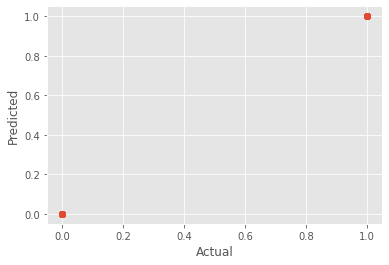

In [25]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

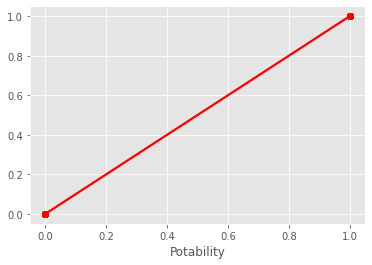

In [26]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

## Classifiation Report

In [27]:
report = classification_report(y_pred, y_test, digits=4)

In [28]:
print(report)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1007
           1     1.0000    1.0000    1.0000       993

    accuracy                         1.0000      2000
   macro avg     1.0000    1.0000    1.0000      2000
weighted avg     1.0000    1.0000    1.0000      2000



In [50]:
import pickle
with open("model.pkl", "wb") as f:
    mp = pickle.dump(dt_model, f)

In [51]:
joblib.dump(dt_model, 'model_joblib')

['model_joblib']

In [52]:
mj = joblib.load('model_joblib')

In [53]:
print(mj)

DecisionTreeClassifier()
